# COM4509/6509 Assignment 2023

Hello, this is programming assignment for *Machine Learning and Adaptive Intelligence*. This is worth 50% of the module grade, the remaining 50% will be assessed via the formal exam.

**Deadline: 11th December 2023, 23:59**

Please submit well before the deadline as there may be delays in the submission. Submission will be via Blackboard, the link will be made available closer to the deadline.

There are 2 parts to this assignment, covering different portions of the course. Both parts are worth 50 marks to give a combined total of 100 marks. Both contain a set of questions which will ask you to implement various machine learning algorithms that are covered throughout the course. You will receive marks for the correctness of your implementations, text based responses to certain questions and the quality of your code. Each question indicates how many marks are available for completing that questions.

### Assignment help

If you are stuck and unsure what you need to do then please ask either in the lectures, labs or on the discussion board. There is a limit to what help we can provide but where possible we will give general guidance with how to proceed. We will also collect frequently asked questions [here](https://docs.google.com/document/d/1aOxtjm1J_A9uYpA7sjdJKodTh72ZHZdwr43B9YCpJGo/edit?usp=sharing).

We are happy for you to discuss the assignment with other students but your code and test answers **must** be your own

### What to submit

- You need to submit your **jupyter notebooks** and a **pdf** copy of it (not zipped together), named:

```
assignment_[username].ipynb
assignment_[username].pdf
```
replacing `[username]` with your username, e.g. `abc18de`.

- **Please execute the cells before your submission**. The **pdf** copy will be used as a backup in case the data gets corrupted and since we cannot run all the notebooks during marking. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the python notebook *and the pdf*.


### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).

### Use of unfair means

This is an individual assignment, while you may discuss this with your classmates, **please make sure you submit your own code**. You are allowed to use code from the labs as a basis of your submission.

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).

### Reproducibility and readibility
Whenever there is randomness in the computation, you MUST set a random seed for reproducibility. Use your UCard number XXXXXXXXX (or the digits in your registration number if you do not have one) as the random seed throughout this assignment. You can set the seeds using torch.manual_seed(XXXXX) and np.random.seed(XXXXX).
Answers for each question should be clearly indicated in your notebook. While code segments are indicated for answers, you may use more cells as necessary.  All code should be clearly documented and explained.
Note: You will make several design choices (e.g. hyperparameters) in this assignment. There are no “standard answers”. You are encouraged to explore several design choices to settle down with good/best ones, if time permits.


Enter your username (used for marking):

In [9]:
username = 'acp23me'
random_seed = 1812839

# Part 1

## Overview
This part of the assignment will focus on lecture 4.

This is the *first* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can. The questions below account for 45 marks. Your submitted code will also be scored based on conciseness, quality, efficiency and commenting (5 marks).

### Assessment Criteria
The marks associated with each question are shown in square brackets. There are also 5 marks for code quality (including readability and efficiency).

You'll get marks for correct code that does what is asked and for text based answers to particular points. You should make sure any figures are plotted properly with axis labels and figure legends.




In [2]:
#We need to download a python file that contains some useful functions.

!wget michaeltsmith.org.uk/assignment.py

--2023-12-10 17:00:57--  http://michaeltsmith.org.uk/assignment.py
Resolving michaeltsmith.org.uk (michaeltsmith.org.uk)... 100.26.179.211
Connecting to michaeltsmith.org.uk (michaeltsmith.org.uk)|100.26.179.211|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17514 (17K) [text/x-python]
Saving to: 'assignment.py.1'

     0K .......... .......                                    100%  180K=0.09s

2023-12-10 17:00:57 (180 KB/s) - 'assignment.py.1' saved [17514/17514]



In [3]:
#and import some modules
import assignment
import numpy as np
import matplotlib.pyplot as plt

# The Problem

Ecologists have monitored the population of Haggis on a particular mountain for five years. They have precise recordings (see `xtrue` and `ytrue`) and estimates from satellite remote sensing (`xdata` and `ydata`). They want to be able to *forecast* the *true population*, 12 months into the future.

In [4]:
xdata,ydata,xtrue,ytrue = assignment.data()

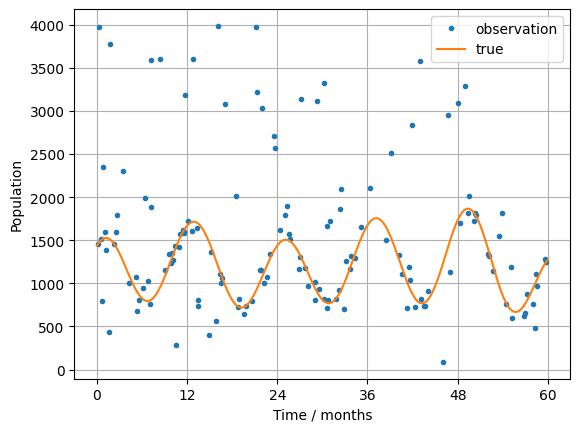

In [5]:
plt.plot(xdata,ydata,'.',label='observation')
plt.plot(xtrue,ytrue,'-',label='true')
plt.xticks(np.arange(0,61,12))
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Question 1 [3 marks]

When developing your model for this problem, how could you split your data into training, validation and testing? (and why?) [max 30 words]

In [6]:
q1 = "3 years as training data. A futher year for cross-validation to fine-tune the model's parameters and avoid overfitting. Lastly, 12 months as test data to evaluate the effectiveness of the model"
assignment.wc(q1)

31 words


### Question 2: Gaussian Basis [9 marks]

In lab 4 you used a polynomial basis. The answer was of the form:

```
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi
```    
    
For this question, write a new function that creates a **Gaussian basis**.

Each basis function is of the form, $\exp[-\frac{(x-c)^2}{2w^2}]$. Where `c` is the centre of each Gaussian basis, and $w$ is a constant (hyperparameter) that says how wide they are. You will want to space them uniformly across the domain specified by `data_limits`. So if `data_limits = [-2, 4]` and `num_basis = 4`. The centres will be at, -2 0 2 4.

Note: For now **we'll not have a constant term** (this will be ok if you standardise your data, as the mean will be zero).

In [7]:
def gaussian(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis
    """
    #To do: Implement
    # Spacing the Gaussian centers uniformly across the data domain
    centers = np.linspace(data_limits[0], data_limits[1], num_basis)
    
    # Create the Gaussian basis matrix
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i] = np.exp(-(x - centers[i])**2 / (2 * width**2))
    
    return Phi
    

assignment.checkQ2(gaussian)

Success


### Question 3: Ordinary Least Squares Regression [7 marks]

Rather than compute the closed form solution we will compute the gradient and use gradient descent for ridge regression (L2 regularisation).

First, write a function to compute the gradient of the sum squared error wrt a parameter vector w. Given it has L2 regularisation (with regularisation parameter $\lambda$).

To get you started, here is the $L2$ regularised cost function:

$$E = (y - \Phi w)^\top  (y - \Phi w) + \lambda w ^ \top w$$

**`Answer:`**
The derivative of E with respect to w = $$\frac{\partial E}{\partial \mathbf{w}} = -2\Phi^\top (\mathbf{y} - \Phi \mathbf{w}) + 2\lambda \mathbf{w}$$


In [8]:
def grad_ridge(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum squared error
    using the design matrix in Phi; under ridge regression with regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    N = Phi.shape[0]
    gradient = -2 * Phi.T.dot(y - Phi.dot(w)) + 2 * lam * w
    
    return gradient
assignment.checkQ3(grad_ridge)

Success


This `grad_descent` function uses gradient descent to minimise the cost function (optimise using an appropriate learning rate).

In [9]:
def grad_descent(grad_fn,Phi,y,lam):
    """
    Compute optimised w.
    Parameters:
       - grad, the gradient function
       - Phi, design matrix (shape N x D)
       - y, vector of observations (length N)
       - lam, regularisation parameter, lambda.
    Returns
       - w_optimsed, a vector (length D) that minimises the ridge regression cost function
    """
    w = np.zeros(Phi.shape[1])
    for it in range(10000):
        g = grad_fn(Phi,y,w,lam)
        w-=0.0001*g
    return w

### Let's see how we're doing...

In this code I standardise the training data labels, and use the methods you have written to make predictions for all the `true` data. Note that I'm holding out the last 12 months to see how the model looks for forecasting. I've also not used any validation, but instead have just used fixed value of the hyperparameters.

47.99
3986.25


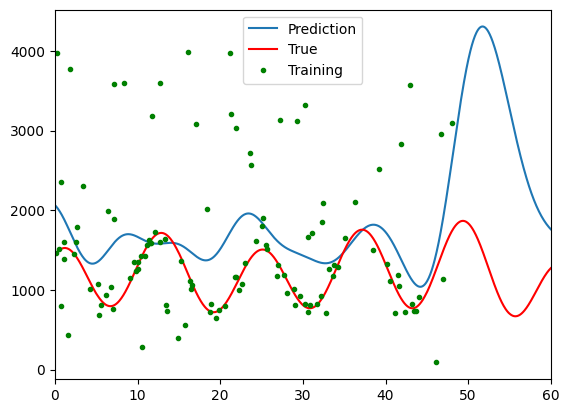

In [10]:
xtrain = xdata[xdata<48]
ytrain = ydata[xdata<48]
xval = xtrue[xtrue>=48]
yval = ytrue[xtrue>=48]

data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardised = (ytrain - data_mean)/data_std

Phi = gaussian(xtrain,120,[0,60],3)
w = grad_descent(grad_ridge,Phi,ytrain_standardised,0.01)
truePhi = gaussian(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.legend()
plt.xlim([0,60])

print(max(xtrain))
print(max(ytrain))


There are two more tasks to do:

1) handle the outliers
2) Use a better basis

### Question 4 [5 marks]

Let's use the sum of absolute errors, rather than the sum squared error, as the cost function. We will also keep the L2 regulariser. So the cost function can be:

$$E = \sum_{i=1}^N{ \Big| [\Phi]_{i} w - y_i \Big|} + \lambda w^\top w$$

Write down a function that computes the gradient of this function wrt w.

In [11]:
def grad_abs(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum absolute error
    using the design matrix in Phi; under L2 regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    N = Phi.shape[0]
    deltas = Phi.dot(w) - y
    
    # Compute the gradient based on the sign of the deltas
    gradient = np.zeros_like(w)
    for i in range(N):
        if deltas[i] > 0:
            gradient += Phi[i]
        elif deltas[i] < 0:
            gradient -= Phi[i]
    
    # Add the regularization term
    gradient += 2 * lam * w
    
    return gradient
assignment.checkQ4(grad_abs)

Success


Let's see what the result looks like, using the absolute error:

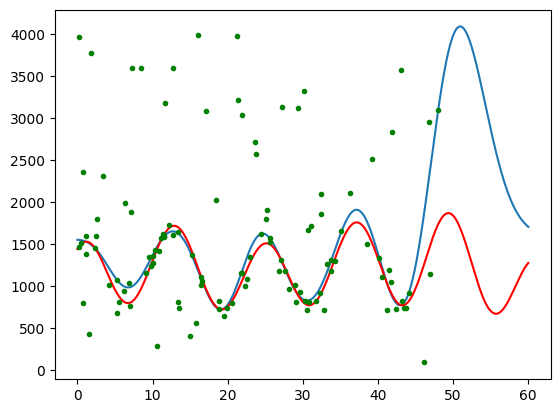

In [12]:
Phi = gaussian(xtrain,120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')

### Question 5 [3 marks]

Comment on this result in terms why this result appears better than the sum-squared cost function [max 30 words]

In [13]:
q5 = "Because the sum of absolute-error function is less sensitive to outliers than the sum of squared-error function, it produces a more accurate model against extreme data points."
assignment.wc(q5)

27 words


### Question 6 [7 marks]

To improve its ability to forecast we observe that there seems to be an annual oscillation in the data. Can you create a basis that combines both Gaussian bases *AND* sinusoidal bases *of the appropriate wavelength*. Please use half of the `num_basis` for the Gaussian bases, and the other half for the sinusoidal ones. All the sinusoidal bases should have a 12 month period, but with a range of offsets (uniformly distributed between 0 and 6, but not including 6).

In [14]:
def gaussian_and_sinusoidal(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis

    Half the bases are Gaussian, half are evenly spaced cosines of 12 month period (offset by between 0 to 6 months)
    """
    num_gaussian = num_basis // 2
    num_sinusoidal = num_basis - num_gaussian
    
    centers_gaussian = np.linspace(data_limits[0], data_limits[1], num_gaussian)
    centers_sinusoidal = np.linspace(0, 6, num_sinusoidal, endpoint=False)
    
    Phi = np.zeros((x.shape[0], num_basis))
    
    # Gaussian basis
    for i in range(num_gaussian):
        Phi[:, i] = np.exp(-(x - centers_gaussian[i])**2 / (2 * width**2))
    
    # Sinusoidal basis (cosines with different offsets)
    for i in range(num_gaussian, num_basis):
        Phi[:, i] = np.cos(2 * np.pi * (x - centers_sinusoidal[i - num_gaussian]) / 12)
    
    return Phi

Let's see how this has affected the result:

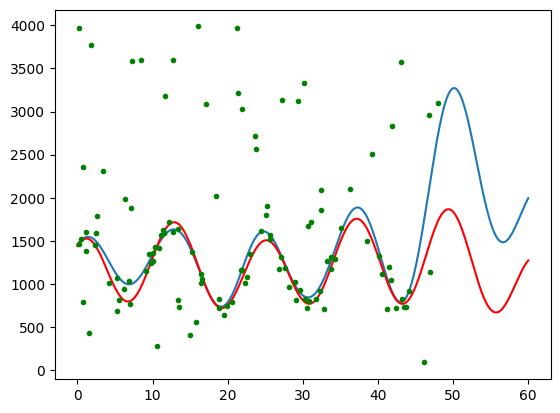

In [15]:
Phi = gaussian_and_sinusoidal(xtrain,120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian_and_sinusoidal(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')

### Question 7 [11 marks]

We now need to select the parameters.

Write some code that:
- Selects good parameters
- Draws a graph of the result

For this question you will need to:
- Decide on how you will select:
    - an appropriate number of bases
    - an appropriate Gaussian basis width
    - an appropriate regularisation term
- (you might want to use a validation set)
- Decide how you will split your data into training and validation. You could use the approach we used at the end of Q3. Remember: You are given the true underlying function, in `xtrue` and `ytrue`, so it is a comparison with that which matters. Remember also that you want to do well at **forecasting**!
- Plot a graph showing (a) the training points used; (b) the true population (`truex`, `truey`); and (c) your predictions.

12
25
1


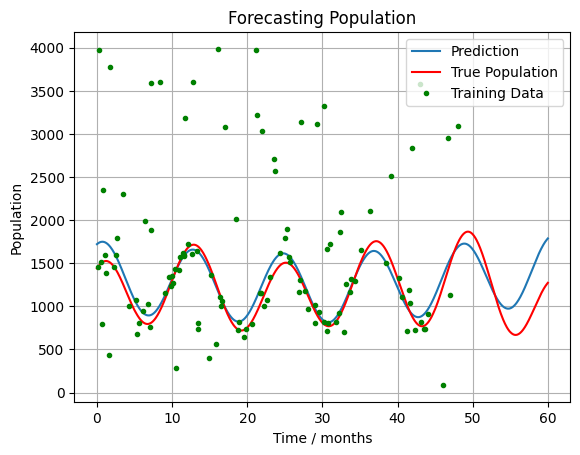

In [16]:
from sklearn.model_selection import KFold
from joblib import Parallel, delayed
from sklearn.metrics import mean_absolute_error

#Step_1: Spliting the data into training, validation, and test sets.
#When it comes to spliting the data we can use the built-in TimeSeriesSplit however, the amount of training data we have is low for
#such method and some splits might not capture representitive variations. 
#Hence, The data is split into three sets training, validation, and test data based on chronilogical order to ensure good performance for forecasting.
x_trainval = xdata[xdata<48]
y_trainval = ydata[xdata<48]
x_test = xtrue[xtrue>=48]
y_test = ytrue[xtrue>=48]

# Standardize y_trainval
data_mean = np.mean(y_trainval)
data_std = np.std(y_trainval)
y_trainval_standardised = (y_trainval - data_mean) / data_std

# Define KFold cross-validation
kf = KFold(n_splits = 5, shuffle = True, random_state = random_seed)
results = []

# Function to evaluate different parameters
def evaluate_params(num_bases, width, reg_param):
    maes = []
    # KFold cross-validation
    for train_idx, val_idx in kf.split(x_trainval):
        x_train, x_val = x_trainval[train_idx], x_trainval[val_idx]
        y_train, y_val = y_trainval_standardised[train_idx], y_trainval_standardised[val_idx]
        
        # Generate design matrices for training and validation sets
        Phi_train = gaussian_and_sinusoidal(x_train, num_bases, [0, 60], width)
        Phi_val = gaussian_and_sinusoidal(x_val, num_bases, [0, 60], width)

        # Compute weights using gradient descent
        w = grad_descent(grad_abs, Phi_train, y_train, reg_param)
        
        # Make predictions using the validation set
        predictions = Phi_val @ w

        # Calculate mean absolute error for each fold
        mae = mean_absolute_error(y_val, predictions)
        maes.append(mae)
    
    # Compute average mean absolute error across all folds
    avg_mae = np.mean(maes)
    
    return avg_mae, num_bases, width, reg_param

# Grid search over different parameters
for num_bases in [4, 6, 8, 10, 12]:
    for width in [5, 10, 15, 20, 25]:
        for reg_param in [0.01, 0.1, 0.2, 1, 10]:
            # Append delayed evaluation of parameters for parallel computation
            results.append(delayed(evaluate_params)(num_bases, width, reg_param))

# Perform parallel computation
computed_results = Parallel(n_jobs=-1)(results)

best_mae = float('inf')
best_params = None

# Find best parameters based on average mean absolute error
for avg_mae, num_bases, width, reg_param in computed_results:
    if avg_mae < best_mae:
        best_mae = avg_mae
        best_params = (num_bases, width, reg_param)

best_num_bases, best_gaussian_width, best_reg_param = best_params

# Train the final model using the best parameters found
final_Phi = gaussian_and_sinusoidal(xtrain, best_num_bases, [0, 60], best_gaussian_width)
final_w = grad_descent(grad_abs, final_Phi, ytrain_standardised, best_reg_param)

# Make predictions on the true underlying function for visualization
true_predictions = gaussian_and_sinusoidal(xtrue, best_num_bases, [0, 60], best_gaussian_width)
# Plotting the results
plt.plot(xtrue, (true_predictions @ final_w) * data_std + data_mean, label='Prediction')
plt.plot(xtrue, ytrue, '-r', label='True Population')
plt.plot(xtrain, ytrain, '.g', label='Training Data')
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.title('Forecasting Population')
plt.legend()
plt.grid()
print(best_num_bases)
print(best_gaussian_width)
print(best_reg_param)

<hr>

# Part 2

This is the *second* of the two parts. Each part accounts for 50\% of the overall coursework mark and this part has a total of 50 marks available.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Q1 straight away then you may still be able to progress with the other questions.

## Overview
This part of the assignment will cover:
- Q1: Dimensionality reduction and clustering (lectures 8 and 9)
- Q2: Classification and neural networks (lectures 6, 7 and 8)


### Assessment Criteria

- The marks for this part are distributed as follows:
    - **Q1**: 20 marks
    - **Q2**: 25 marks
    - **Code quality** (including readability and efficiency): 5 marks
- You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

If you are unsure about how to proceed then please ask. We will compile a list of



## Question 1: Clustering and dimensionality reduction [20 marks]

For this question you are asked apply a **clustering algorithm** of your choice (e.g K-means or spectral clustering) to a dataset with a large number of features, then apply a **dimensionality reduction** method (e.g PCA, Auto-encoder) to plot the clusters in a reduced feature space.

The dataset that you will be using is the UCI Human Activity Recognition dataset ([link](https://doi.org/10.24432/C54S4K)) which contains measurements using smartphone sensors during certain activities. The data has been pre-processed to give **561** features, representing many different aspects of the sensor dynamics. While this is a timeseries we will only consider individual samples, of which there are **7352** in the training set. This has been provided on Blackboard and can be downloaded as a compressed .npz file.

### What you need to do

This question is split into 4 sub-parts, each will be marked based not only on the correctness of your code solution but a short text response to either justify the algorithms used or a discussion of the results of your code.
The 4 parts to this questions are:
1) Choosing and applying a clustering algorithm to the data and justifying your approach.
2) Analysing the quality of the clustering solution and discussing the results.
3) Choosing and applying a dimensionality reduction technique and justifying your approach.
4) Plotting the clusters in the reduced feature space and discussing the plots.




In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset = np.load('./UCI_HAR.npz')

x_train = dataset['x_train']
y_train = dataset['y_train']

print(f'The training set contains {x_train.shape[0]} samples, each with {x_train.shape[1]} features.')
print(f'There are {len(np.unique(y_train))} classes.')

The training set contains 7352 samples, each with 561 features.
There are 6 classes.


### 1.1 Clustering of the data [5 marks]

Choose a clustering algorithm (either one from class or an appropriate one from elsewhere) and apply it to this dataset. You will need to perform some analysis to select any necessary hyper-parameters.

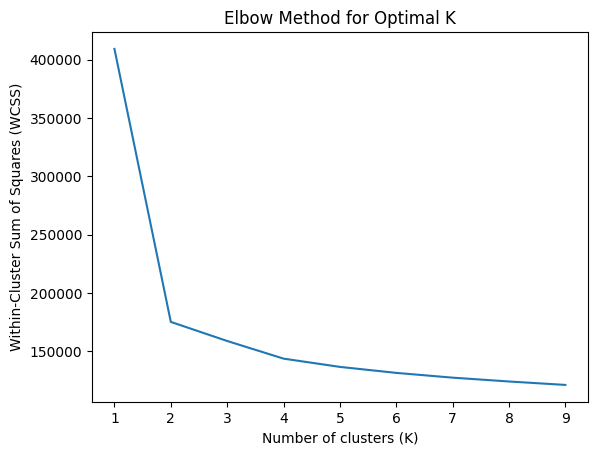

In [86]:
# Program your clustering solution here. You may use multiple cell blocks as appropriate.
from sklearn.cluster import k_means


# A good value since we have six classes
Kvals = np.arange(1,10)
inertias = np.zeros(len(Kvals))

for i,K in enumerate(Kvals):
    km_centroids, km_clusters, inertias[i] = k_means(x_train, n_init=10, n_clusters=K)
    
plt.plot(Kvals, inertias)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

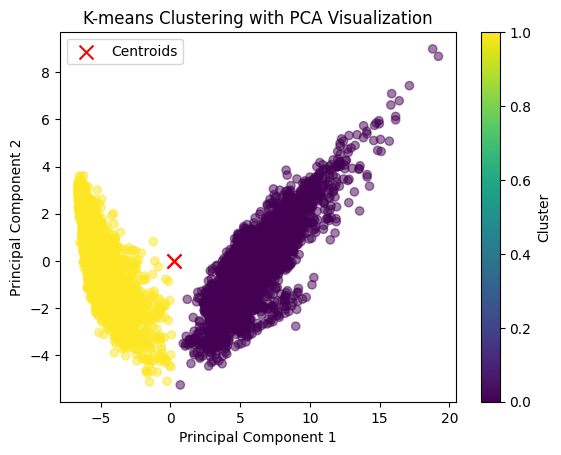

In [89]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Perform K-means clustering
K = 2  # Number of clusters based on the elbow method
km_centroids, km_clusters, inertias[i] = k_means(x_train, n_init=10, n_clusters=K)

# Visualize clusters and centroids
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=km_clusters, cmap='viridis', alpha=0.5)
plt.scatter(km_centroids[:, 0], km_centroids[:, 1], s=100, c='red', marker='x', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In the following markdown block, provide a justification of the algorithm that you selected and of any hyper-parameters that you have selected.

*Write your answer here.*

**`ANSWER`**

**Algorithm Selected K_means Clustering**

It works well with large datasets making it suitable for this dataset with 7532 samples and 561 features. It is also easy to understand and implement. K_means assign points to clusters with the nearest centroid, which could align with the humans activity structure of distinct group.

**Hyperparameters**

Number of of optimum Clusters (K = 2) as it can be easly determined from the elbow method using Within-Cluster Sum of Squares(WCSS).
n_init = 10, just using the auto value of 10 of the number of times k-means will be run.
randomstate = random_seed(student_ID)

### 1.2 Analysis of the clustering quality [5 marks]

Using an appropriate analysis metric (e.g, cluster purity, the labels are available to use in the `y_train` array), measure the quality of the clustering.

In [94]:
# Program your cluster quality metric here
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_train, km_clusters)
print(f"Adjusted Rand Index (ARI): {ari_score}")



Adjusted Rand Index (ARI): 0.3299555315656998


Write a short discussion of these results commenting on the clustering performance, the relevance of your chosen analysis metric and any conclusions you have about the clustering of the data.



*Write your discussion here*

**`ANSWER`**

The ARI value varies from -1 (less than expected), 0 (random clustering), to 1 (100 accurate).

ARI = 0.33 indicates a moderate level of similarity between the clusters obtained from the clustering algorithm and the ground truth labels of the data.

However it is not good enough maybe spectral clustering would have been better.


### 1.3 Training a dimensionality reduction method [5 marks]

Now you will need to choose a dimensionality reduction method that is able to reduce the number of features down to **3**. Again, where necessary you will need to select appropriate hyper-parameters.

In [95]:
# Program your dimensionality reduction here.
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3, random_state = random_seed)
x_train_reduced = pca.fit_transform(x_train)

print(f"Shape of reduced features: {x_train_reduced.shape}")


Shape of reduced features: (7352, 3)


In the following markdown block, provide a justification for the dimensionality reduction technique that you have used and (if any) how you selected your hyper-parameters. Be clear as to the advantages and disadvantages to your approach.

*Write your discussion here*

**`ANSWER`**

PCA was chosen for dimensionality reduction due to its ability to preserve information by capturing the maximum variance in the data, its principale components are othogonal meaning they are independent and represent differnt attributes of the data. PCA is also efficient and can easly run on our dataset.

n_components is the only hyper parameter and it is set to 3 to reduce the dimentions of the data to 3 dimentions

### 1.4 Plotting the clusters in the reduced feature space [5 marks]

Now that you have transformed your data into 3 dimensions, create a set of plots to show the clusters in these reduced dimensions. Make separate plots using the clustering labels from part 1.1 and also the ground truth labels to show how well it has been clustered. Where possible combine the figures in sensible ways using subplots.

Plot these as a set of 2d plots of the combinations of all the reduced dimensions. You may additionally plot this as a 3d plot, if this helps with the visualisation.

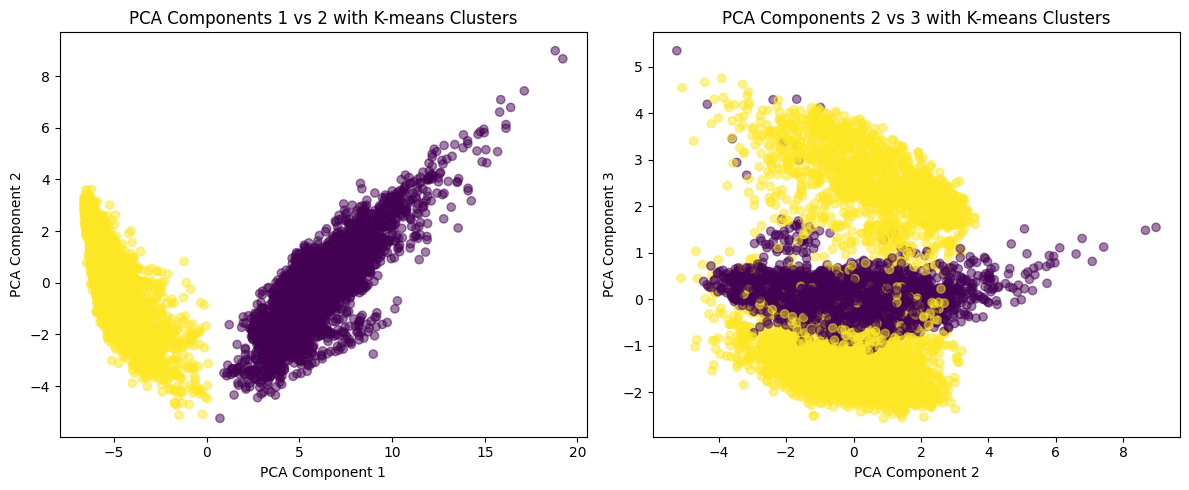

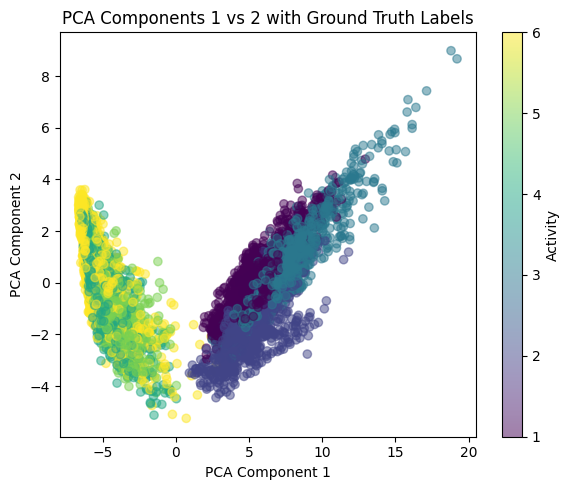

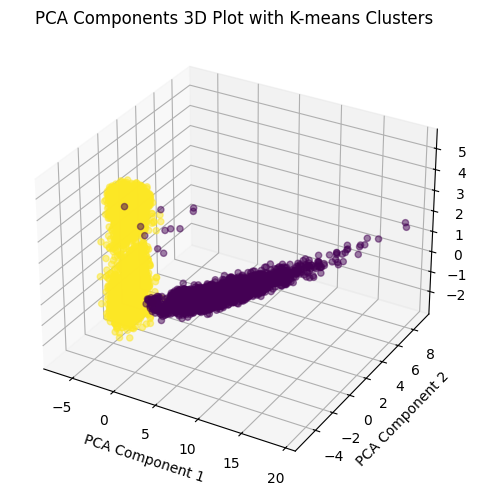

In [96]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#Plot clusters based on K-means labels
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting in 2D
for i in range(2):
    axs[i].scatter(x_train_reduced[:, i], x_train_reduced[:, (i + 1) % 3], c=km_clusters, cmap='viridis', alpha=0.5)
    axs[i].set_xlabel(f'PCA Component {i + 1}')
    axs[i].set_ylabel(f'PCA Component {(i + 1) % 3 + 1}')
    axs[i].set_title(f'PCA Components {i + 1} vs {(i + 1) % 3 + 1} with K-means Clusters')

plt.tight_layout()
plt.show()

# Plot clusters based on ground truth labels
fig = plt.figure(figsize=(6, 5))

plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components 1 vs 2 with Ground Truth Labels')
plt.colorbar(label='Activity')

plt.tight_layout()
plt.show()


# 3D plot for clustering labels
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], x_train_reduced[:, 2], c=km_clusters, cmap='viridis', alpha=0.5)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('PCA Components 3D Plot with K-means Clusters')

plt.tight_layout()
plt.show()



Write a short comment on your plots, evaluating the performance of the dimensionality reduction and how well the clustering has done in this visualisation. Are there any key conclusion spanning the whole question that you can draw?

*Write your discussion here*

**`ANSWER`**

The clusters of data obtained from K-means(with elbow method for optimum num of clusters) show some separation between clusters. However, the overlap is significant.

## Question 2: Classification and neural networks [25 marks]

This second questions will look at implementing classifier models via supervised learning to correctly classify images. We will be using images from the MedMNIST dataset which contains a range of health related image datasets that have been designed to match the shape of the original digits MNIST dataset. Specifically we will be working with the BloodMNIST part of the dataset. The code below will download the dataset for you and load the numpy data file. The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a 28 by 28 RGB image and are not normalised. You will need to consider any necessary pre-processing.

Your task in this questions is to train **at least 4** different classifier architectures (e.g logistic regression, fully-connected network etc) on this dataset and compare their performance. These can be any of the classifier models introduced in class or any reasonable model from elsewhere. You should consider 4 architectures that are a of suitable variety i.e simply changing the activation function would score lower marks than trying different layer combinations.

This question will be broken into the following parts:
1. A text description of the model architectures that you have selected and a justification of why you have chosen them. Marks will be awarded for suitability, variety and quality of the architectures.
2. The training of the models and the optimisation of any hyper-parameters.
3. A plot comparing the accuracy and error (or loss), on separate graphs, of the different architectures and a short discussion of the results.

In [2]:
import numpy as np
import urllib.request
import os

# Download the dataset to the local folder
if not os.path.isfile('./bloodmnist.npz'):
    urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/bloodmnist.npz?download=1', 'bloodmnist.npz')

# Load the compressed numpy array file
dataset = np.load('./bloodmnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)

train_images (11959, 28, 28, 3) uint8
train_labels (11959, 1) uint8
val_images (1712, 28, 28, 3) uint8
val_labels (1712, 1) uint8
test_images (3421, 28, 28, 3) uint8
test_labels (3421, 1) uint8


In [3]:
print(dataset['train_images'].shape)
print(dataset['train_labels'].shape)

(11959, 28, 28, 3)
(11959, 1)


### 2.1 What models/architectures have you chosen to implement [5 marks]

In the following block, write a short (max 200 words) description and justification of the architectures that you have chosen to implement. You should also think about any optimisers and error or loss functions that you will be using and why they might be suitable.

*Write your answer here.*

**`Answer:`**

The 4 proposed ML model architectures are:

1) Extreme Learning Machine (EML):

    **Description:**

    A single hidden layer neural network that randomely assigns weights between the input and hidden layer and learns output layer weights. It was proposed by: 
    "Mercaldo, F.; Brunese, L.; Martinelli, F.; Santone, A.; Cesarelli, M. Experimenting with Extreme Learning Machine for Biomedical Image Classification. Appl. Sci. 2023, 13, 8558. https://doi.org/10.3390/app13148558".

    **Justification:**

    As discussed by the paper, ELM is able to achieve a performance comarable to classic models whith much shorter time.

2) Convolutional Neural Network (CNN):

    **Description:**

    A deep learning model consisting of 2 alternating convolutional and pooling layers, followed by 3 fully connected layers. 

    **Justification:**

    It is specifically desined for grid-like data structures(i.e. Images), can learn local spatial features in small regions of the image, and, as mentioned in the lab, achieved great performance since it got out.

3) Multi-Layer Preceptron (MLP):

    **Description:**

    Multiple hidden layers, possibly 3, with varied neuron counts. Learning complex non-linear features using the relu activation function.

    **Justification:**

    Good for image classification, using multiple layers and capturing non-linear features through activation. MLP is also fast and offers a wide range of hyperparameters, which is good for tunning.

4) Logistic Regression (LR):

    **Description:**

    Just a simple single layer with a logistic regression function using lbgfs solver and l2 for penalty. 

    **Justification:**

    Main reason is the comparason between a very simple, but effective classification model and the rest of the models. Is the trade off worth it?

**Optimisation and loss for all models:**

In medical image classification it is more important to penalise incorrect predictions heavly, hence Cross-entropy loss for the loss function.

Optimisers depend on the model, but mainly SGD with momentum to accelerate convergence towards minimum loss.


### 2.2 Implementation and training of your models. [10 marks]

You should now implement the models that you have introduced above, train them and optimise any hyper-parameters using the validation set. You may wish to store any training results for the next sub-question.

In [3]:
# Split the dataset into features and labels
X_train = dataset['train_images']
y_train = dataset['train_labels']
X_val = dataset['val_images']
y_val = dataset['val_labels']
X_test = dataset['test_images']
y_test = dataset['test_labels']

# Determining the number of unique classes to determine the output size.
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print(f"Unique classes: {unique_classes}")
print(f"Number of classes: {num_classes}\n")

#Determining the shape and data type to use in the development of the models
print(type(y_train),"\n")
print("Shape of X:", X_train.shape,"\n")
print("Shape of Y:", y_train.shape,"\n")

Unique classes: [0 1 2 3 4 5 6 7]
Number of classes: 8

<class 'numpy.ndarray'> 

Shape of X: (11959, 28, 28, 3) 

Shape of Y: (11959, 1) 



In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import KFold


# Data X_train, y_train, X_test, y_test, X_val, y_val is defined and split above.

# Reshape the image data for ELM
X_train_flatten = X_train.reshape(X_train.shape[0], -1)  # Flatten training images
X_test_flatten = X_test.reshape(X_test.shape[0], -1)  # Flatten test images
X_val_flatten = X_val.reshape(X_val.shape[0], -1)  # Flatten validation images

# Normalize the pixel values to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train_flatten)
X_test_normalized = scaler.transform(X_test_flatten)
X_val_normalized = scaler.transform(X_val_flatten)

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
# Fit and transform y_train to one-hot encoded format to match the model's output format.
y_train_one_hot = onehot_encoder.fit_transform(y_train)
y_val_one_hot = onehot_encoder.transform(y_val)

class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize random weights for input to hidden layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        # Initialize random biases for hidden layer
        self.biases_hidden = np.random.randn(self.hidden_size)
    
    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def train(self, X, y):
        # Compute hidden layer output
        hidden_output = self.relu(np.dot(X, self.weights_input_hidden) + self.biases_hidden)
        
        # Compute output weights using pseudo-inverse
        self.weights_hidden_output = np.dot(np.linalg.pinv(hidden_output), y)
        
    def predict(self, X):
        # Forward pass
        hidden_output = self.relu(np.dot(X, self.weights_input_hidden) + self.biases_hidden)
        output = np.dot(hidden_output, self.weights_hidden_output)
        return self.softmax(output)
    
# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)
    
# Initialize ELM model
input_size = X_train_normalized.shape[1]
num_classes = len(np.unique(y_train))
output_size = num_classes
np.random.seed(random_seed)  # Assuming a random seed value

# Define a function to evaluate the model with different hidden sizes
def evaluate_hidden_size(hidden_size, X_train, y_train, X_val, y_val):
    input_size = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    output_size = num_classes

    elm = ELM(input_size, hidden_size, output_size)
    elm.train(X_train, y_train)

    # Predict using the trained model for validation data
    y_val_pred_probs = elm.predict(X_val)

    # Calculate cross-entropy loss for validation data
    val_loss = log_loss(y_true=y_val, y_pred=y_val_pred_probs)
    return val_loss

best_hidden_size_per_fold = []

# Hyperparameter tuning
# Loop through each fold for cross-validation
for train_index, val_index in kf.split(X_train_normalized):
    X_train_fold, X_val_fold = X_train_normalized[train_index], X_train_normalized[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    best_hidden_size = None
    best_val_loss = float('inf')
    hidden_sizes_to_try = [500, 750, 1000, 1250, 1500]

    for hidden_size in hidden_sizes_to_try:
        val_loss = evaluate_hidden_size(hidden_size, X_train_fold, y_train_fold, X_val_fold, y_val_fold)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_hidden_size = hidden_size

    best_hidden_size_per_fold.append(best_hidden_size)
    
# Choose the most common hidden size across folds
best_hidden_size = max(set(best_hidden_size_per_fold), key=best_hidden_size_per_fold.count)

# Reinitialize the model with the best hidden size found
#print(best_hidden_size)
best_elm = ELM(input_size, best_hidden_size, output_size)
best_elm.train(X_train_normalized, y_train_one_hot)


# Predict using the trained model for both training and testing data
y_train_pred_probs = best_elm.predict(X_train_normalized)
y_test_pred_probs = best_elm.predict(X_test_normalized)

# Calculate accuracy for training data
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
ELM_train_accuracy = accuracy_score(y_train.flatten(), y_train_pred)
print(f"Training Accuracy: {ELM_train_accuracy:.4f}")

# Calculate cross-entropy loss for training data
ELM_train_loss = log_loss(y_true=y_train, y_pred=y_train_pred_probs)
print(f"Training Cross-entropy Loss: {ELM_train_loss:.4f}")

# Calculate accuracy for testing data
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
ELM_test_accuracy = accuracy_score(y_test.flatten(), y_test_pred)
print(f"Testing Accuracy: {ELM_test_accuracy:.4f}")

# Calculate cross-entropy loss for testing data
ELM_test_loss = log_loss(y_true=y_test, y_pred=y_test_pred_probs)
print(f"Testing Cross-entropy Loss: {ELM_test_loss:.4f}")

# Calculate F1 score for training data
ELM_train_f1 = f1_score(y_train, y_train_pred, average='micro')
print(f"Training F1 Score: {ELM_train_f1:.4f}")

# Calculate F1 score for testing data
ELM_test_f1 = f1_score(y_test, y_test_pred, average='micro')
print(f"Testing F1 Score: {ELM_test_f1:.4f}")


Training Accuracy: 0.8857
Training Cross-entropy Loss: 1.5569
Testing Accuracy: 0.8012
Testing Cross-entropy Loss: 1.6017
Training F1 Score: 0.8857
Testing F1 Score: 0.8012


[1,   400] loss: 2.023
[1,   800] loss: 1.731
[1,  1200] loss: 1.115
Finished Training Epoch 1
Accuracy on epoch 1: 0.3747
Average Loss: 1.1148
[2,   400] loss: 0.871
[2,   800] loss: 0.770
[2,  1200] loss: 0.705
Finished Training Epoch 2
Accuracy on epoch 2: 0.6974
Average Loss: 0.7050
[3,   400] loss: 0.636
[3,   800] loss: 0.573
[3,  1200] loss: 0.564
Finished Training Epoch 3
Accuracy on epoch 3: 0.7758
Average Loss: 0.5642
[4,   400] loss: 0.480
[4,   800] loss: 0.494
[4,  1200] loss: 0.476
Finished Training Epoch 4
Accuracy on epoch 4: 0.8210
Average Loss: 0.4757
[5,   400] loss: 0.444
[5,   800] loss: 0.420
[5,  1200] loss: 0.435
Finished Training Epoch 5
Accuracy on epoch 5: 0.8380
Average Loss: 0.4345
[6,   400] loss: 0.390
[6,   800] loss: 0.405
[6,  1200] loss: 0.389
Finished Training Epoch 6
Accuracy on epoch 6: 0.8585
Average Loss: 0.3895
[7,   400] loss: 0.360
[7,   800] loss: 0.354
[7,  1200] loss: 0.368
Finished Training Epoch 7
Accuracy on epoch 7: 0.8694
Average Loss:

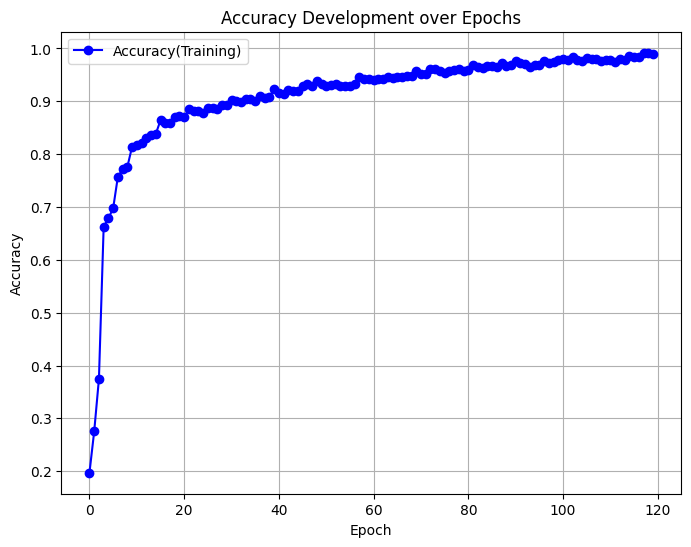

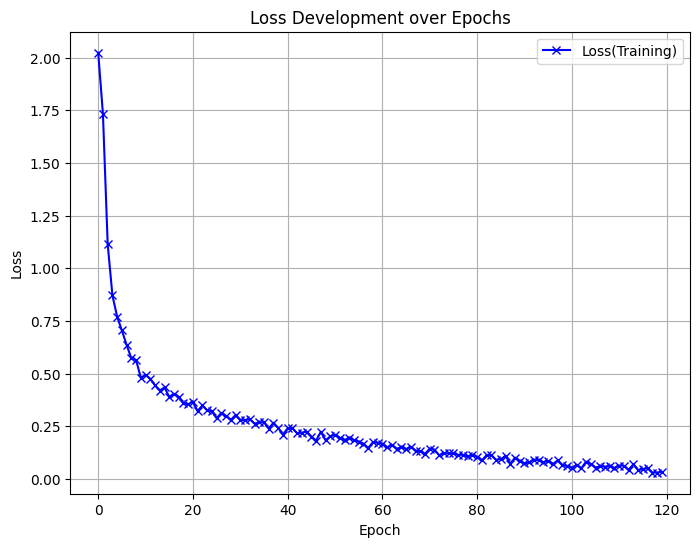

In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, f1_score


#Cross Validation was not performed on this model as it requires a very long time and computational power that I do not posses.
#The hyperparameters like (batch_size, kernal_size, max_epochs) were chosen as average values were overfitting is avoided
#and time/power consumption is minimised.

# Set the random seed for reproducibility
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# Data already defined and split in the above cells

# Defining a transformer to convert data to PyTorch tensors and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing pixel values
])

# Custom dataset class to help load and apply transformation of the data.
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample, label

# Create DataLoader for training and testing datasets

batch_size = 8
#Load the training data
train_data = CustomDataset(X_train, y_train, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

#Load the test data
test_data = CustomDataset(X_test, y_test, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define a simple Convolutional Neural Network (CNN) model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
        #in chan must match out from prev conv layer
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
        self.pool = nn.MaxPool2d(2, 2)
        #initial image size = 3 * 28 * 28
        #             conv1 = 6 * 24 * 24
        #           pooling = 6 * 12 * 12
        #             conv2 = 16 * 8 * 8
        #           pooling = 16 * 4 * 4
        self.fc1 = nn.Linear(in_features = 16 * 4 * 4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 8)  # 8 obtained output classes
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the CNN model and send it to the appropriate device (GPU or CPU)
CNN_model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, train_loader, criterion, optimizer, max_epochs):
    epoch_list = []
    loss_list = []
    accuracy_list = []

    for epoch in range(max_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward and backward and optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels.squeeze())
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels.squeeze()).sum().item()
            
            if i % 400 == 399:    # print every 400 mini-batches
                avg_loss = running_loss / 400
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, avg_loss))
                loss_list.append(avg_loss)
                running_loss = 0.0
                
                accuracy = correct / total
                accuracy_list.append(accuracy)

        # Store epoch and loss for plottin
            
        epoch_list.append(epoch + 1)

        print('Finished Training Epoch', epoch + 1)
        print(f"Accuracy on epoch {epoch + 1}: {accuracy:.4f}")
        avg_loss = loss_list[len(loss_list) - 1]
        print(f"Average Loss: {avg_loss:.4f}")

    return epoch_list, loss_list, accuracy_list


def evaluate_model(model, data_loader, criterion):
    data_loss = 0.0
    all_predictions = []
    correct_labels = []

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels.squeeze())
            data_loss += loss.item()

            _, predicted = torch.max(outputs, 1)            
            # Collect predictions and labels for accuracy and F1-score calculations
            all_predictions.extend(predicted.numpy())
            correct_labels.extend(labels.squeeze().numpy())
            

        avg_loss = data_loss / len(data_loader)   
        accuracy = accuracy_score(correct_labels, all_predictions)
        f1 = f1_score(correct_labels, all_predictions, average='micro')
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Average Loss: {avg_loss:.4f}")
        print(f"F1-score: {f1:.4f}")

    return accuracy, avg_loss, f1


train_epoch_list, train_losses, train_acuuracies = train_model(CNN_model, train_loader, criterion, optimizer, 40)

CNN_train_accuracy, CNN_train_loss, CNN_train_f1 = evaluate_model(CNN_model, train_loader, criterion)
CNN_test_accuracy, CNN_test_loss, CNN_test_f1 = evaluate_model(CNN_model, test_loader, criterion)


#CNN Plots
# Plotting accuracy vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(train_acuuracies, marker='o', label='Accuracy(Training)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Development over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss vs. epoch
plt.figure(figsize=(8, 6))
plt.plot(train_losses, marker='x', label='Loss(Training)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Development over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score


# Set seed for reproducibility
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# Data X_train, y_train, X_test, y_test is already defined above

# Convert data to PyTorch tensors
x_train_t = torch.Tensor(X_train)
y_train_t = torch.Tensor(y_train).squeeze().long()  # Squeeze to remove unnecessary dimensions

x_test_t = torch.Tensor(X_test)
y_test_t = torch.Tensor(y_test).squeeze().long()

# Normalize the data to the range [0, 1]
x_train_t /= 255.0
x_test_t /= 255.0

# Define model architecture
input_size = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
hidden_size1 = 256
hidden_size2 = 128
output_size = len(np.unique(y_train))

model = nn.Sequential(
    nn.Linear(input_size, hidden_size1, True),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2, True),
    nn.ReLU(),
    nn.Linear(hidden_size2, output_size, True)
)

# Loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Convert data into PyTorch DataLoader for batching
train_dataset = TensorDataset(x_train_t.view(-1, input_size), y_train_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training the model
num_epochs = 200

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Evaluation on training data
with torch.no_grad():
    outputs = model(x_train_t.view(-1, input_size))
    MLP_train_loss = loss_function(outputs, y_train_t)
    train_predictions = torch.argmax(outputs, dim=1)
    MLP_train_accuracy = accuracy_score(y_train_t.numpy(), train_predictions.numpy())
    MLP_train_f1 = f1_score(y_train_t.numpy(), train_predictions.numpy(), average='micro')

print(f"Training Accuracy: {MLP_train_accuracy:.4f}, Training Loss: {MLP_train_loss.item():.4f}, Training F1-score: {MLP_train_f1:.4f}")

# Evaluation on testing data
with torch.no_grad():
    outputs = model(x_test_t.view(-1, input_size))
    MLP_test_loss = loss_function(outputs, y_test_t)
    test_predictions = torch.argmax(outputs, dim=1)
    MLP_test_accuracy = accuracy_score(y_test_t.numpy(), test_predictions.numpy())
    MLP_test_f1 = f1_score(y_test_t.numpy(), test_predictions.numpy(), average='micro')

print(f"Testing Accuracy: {MLP_test_accuracy:.4f}, Testing Loss: {MLP_test_loss.item():.4f}, Testing F1-score: {MLP_test_f1:.4f}")


Epoch [1/200], Loss: 1.4293
Epoch [2/200], Loss: 0.9803
Epoch [3/200], Loss: 0.9199
Epoch [4/200], Loss: 0.8454
Epoch [5/200], Loss: 0.7828
Epoch [6/200], Loss: 0.7857
Epoch [7/200], Loss: 0.7402
Epoch [8/200], Loss: 0.7141
Epoch [9/200], Loss: 0.6921
Epoch [10/200], Loss: 0.6655
Epoch [11/200], Loss: 0.6457
Epoch [12/200], Loss: 0.6620
Epoch [13/200], Loss: 0.6438
Epoch [14/200], Loss: 0.5793
Epoch [15/200], Loss: 0.6302
Epoch [16/200], Loss: 0.5684
Epoch [17/200], Loss: 0.5637
Epoch [18/200], Loss: 0.5405
Epoch [19/200], Loss: 0.5711
Epoch [20/200], Loss: 0.5560
Epoch [21/200], Loss: 0.5639
Epoch [22/200], Loss: 0.5147
Epoch [23/200], Loss: 0.5313
Epoch [24/200], Loss: 0.5209
Epoch [25/200], Loss: 0.5231
Epoch [26/200], Loss: 0.4861
Epoch [27/200], Loss: 0.4873
Epoch [28/200], Loss: 0.5142
Epoch [29/200], Loss: 0.4840
Epoch [30/200], Loss: 0.4687
Epoch [31/200], Loss: 0.4989
Epoch [32/200], Loss: 0.4508
Epoch [33/200], Loss: 0.4762
Epoch [34/200], Loss: 0.4438
Epoch [35/200], Loss: 0

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.model_selection import RandomizedSearchCV


# data X_train, y_train, X_test, and y_test is already defined above 

# Flatten the images for logistic regression (assuming each image is 28x28x3)
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
y_train_flat = y_train.flatten()
y_val_flat = y_val.flatten()
X_test_flat = (X_test.reshape(len(X_test), -1))

# Normalize the pixel values to be between 0 and 1
X_train_normalized = X_train_flat / 255.0
X_val_normalized = X_val_flat / 255.0
X_test_normalized = X_test_flat / 255.0

# Initialize logistic regression model with SGD optimizer and cross-entropy loss
logreg = LogisticRegression(penalty='l2', max_iter= 20, random_state=random_seed)

# Create parameter grid for grid search
param_grid = {
    'solver': ['lbfgs', 'sag'],
}

random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=random_seed)
random_search.fit(X_val_normalized, y_val_flat)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the model using the best parameters
best_params_logreg = LogisticRegression(penalty='l2', solver=best_params["solver"], max_iter=80, random_state=random_seed)
# Train the logistic regression model on best parameters
best_params_logreg.fit(X_train_normalized, y_train_flat)

# Predict on training and testing data
y_train_pred = best_params_logreg.predict(X_train_normalized)
y_test_pred = best_params_logreg.predict(X_test_normalized)

# Calculate accuracy for training and testing data
LR_train_accuracy = accuracy_score(y_train_flat, y_train_pred)
LR_test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate loss (cross-entropy) for training and testing data
LR_train_loss = log_loss(y_train_flat, best_params_logreg.predict_proba(X_train_normalized))
LR_test_loss = log_loss(y_test, best_params_logreg.predict_proba(X_test_normalized))

# Calculate F1 score for training and testing data
LR_train_f1 = f1_score(y_train_flat, y_train_pred, average='micro')
LR_test_f1 = f1_score(y_test, y_test_pred, average='micro')

# Display the metrics
print(f"Training Accuracy: {LR_train_accuracy:.4f}")
print(f"Testing Accuracy: {LR_test_accuracy:.4f}")
print(f"Training Loss (Cross-Entropy): {LR_train_loss:.4f}")
print(f"Testing Loss (Cross-Entropy): {LR_test_loss:.4f}")
print(f"Training F1 Score: {LR_train_f1:.4f}")
print(f"Testing F1 Score: {LR_test_f1:.4f}")

Best Hyperparameters: {'solver': 'sag'}
Training Accuracy: 0.8808
Testing Accuracy: 0.8310
Training Loss (Cross-Entropy): 0.3787
Testing Loss (Cross-Entropy): 0.5022
Training F1 Score: 0.8808
Testing F1 Score: 0.8310


In the following block, comment on the success of the training process and provide a description of how you have selected or optimised any hyper-parameters.

*Write your answer here.*

**`Answer:`**

All the models were trained successfully achieving good performance metrics. 

The Logistic Regression used cross-validation with randomised gridsearch to tune the solver hyperparameter based on accuracy on the validation set. Tuning the rest of the parameters would require a substantial amount of time, thus they were chosen manually but carefully to avoid overfitting. lbfgs only supports l2 for penalty and hence it was chosen.

The ELM model also used cross-validation with Kfold to tune the hyper parameters based on log-loss. 

MLP and CNN models are already very complex and take about 2 minutes to train; performing cross-validation and parameter tuning on such models would require power and time that are not available. However, the SGD optimisation function with momentum was used to accelarate the  convergance towards minimum loss. 

The remaining parameters (batch_size, hidden_layer_size, kernal_size, epochs) were chosen to provide a balance between training time and performance based on the following attributes.

batch_size: The larger the batch_size, the faster the computation, but the more memory intensive.

Hidden_layer_size: the number of neurons; the greater the number, the better the performance, but the greater the risk of overfitting.

Kernal_size: the size of the CNN's convolutional filter; a larger kernal size allows the model to learn more complex features on the cost of time and power.

Epochs: are rounds of training; the higher the number, the better, but the trade-off is time and power.


### 2.3 Classification results based on the test data [10 marks]

You should now plot the accuracy and error (or loss), on separate graphs, for the training and testing set. You may also undertake any other performance analysis of your models.

In [20]:
def plot_metrics(models, training_metric, testing_metric, metric_str):
    bar_width = 0.35
    index = range(len(models))

    plt.figure(figsize=(8, 5))
    bar1 = plt.bar(index, training_metric, bar_width, label='Training', color='green')
    bar2 = plt.bar([i + bar_width for i in index], testing_metric, bar_width, label='Testing', color='orange')

    plt.xlabel('Models')
    plt.ylabel(metric_str)
    plt.title(metric_str + ' Comparison for Different Models')
    plt.xticks([i + bar_width / 2 for i in index], models)
    plt.legend()
    plt.grid(True)
    plt.show()

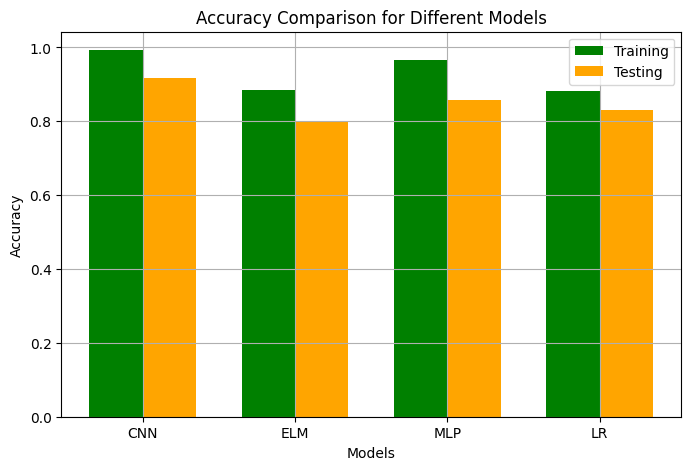

In [26]:
models = ["CNN", "ELM", "MLP", "LR"]
training_accuracies = [CNN_train_accuracy, ELM_train_accuracy, MLP_train_accuracy, LR_train_accuracy]
testing_accuracies = [CNN_test_accuracy, ELM_test_accuracy, MLP_test_accuracy, LR_test_accuracy]

plot_metrics(models, training_accuracies, testing_accuracies, "Accuracy")


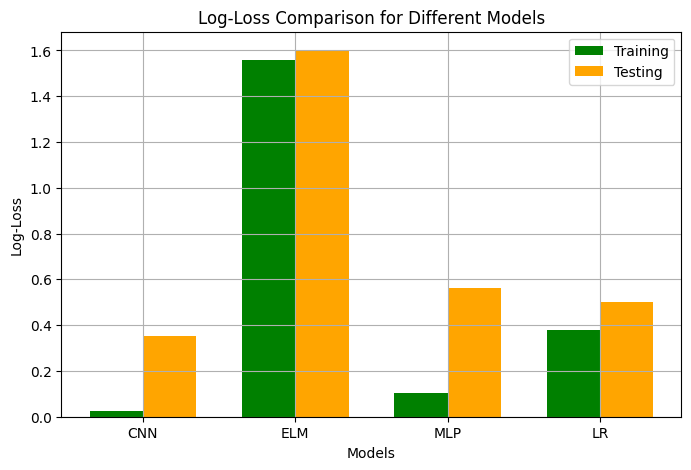

In [27]:
training_losses = [CNN_train_loss, ELM_train_loss, MLP_train_loss, LR_train_loss]
testing_losses = [CNN_test_loss, ELM_test_loss, MLP_test_loss, LR_test_loss]

plot_metrics(models, training_losses, testing_losses, "Log-Loss")


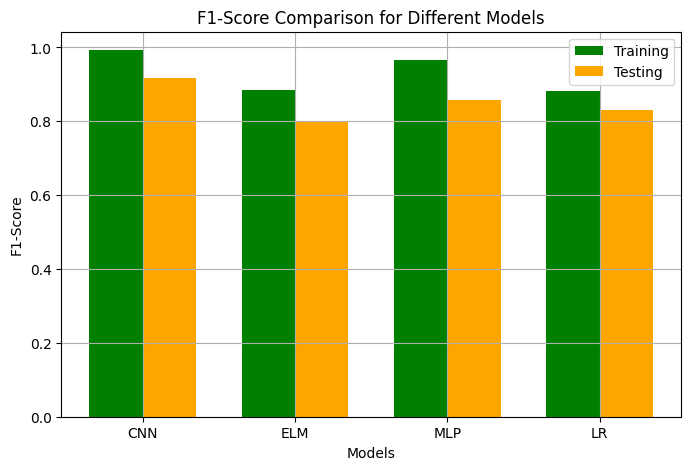

In [28]:
training_f1s = [CNN_train_f1, ELM_train_f1, MLP_train_f1, LR_train_f1]
testing_f1s = [CNN_test_f1, ELM_test_f1, MLP_test_f1, LR_test_f1]

plot_metrics(models, training_f1s, testing_f1s, "F1-Score")


Now provide a short discussion evaluating your results and the architectures that you have used. Provide any conclusions that you can make from the data:

*Write your answer here.*

**`ANSWER:`**

The four models achieved good results across almost all metrics.

CNN had the highest overall score, followed by MLP, ELM, and LR. CNN and MLP were expected to perform the best because, unlike ELM and LR, they can both deal with learning complex and spatial features. Although the performance gap was not substantial, it is possible that MLP and CNN did not achieve their peak performance based on the training time available. But one thing is certain: the learning rate based on training time is significantly higher in CNN and then in MLP than the rest. While CNN takes longer to run each epoch, it achieved the best results with only 40 epochs compared to MLP's 200 epochs. 

The high performance of LR and ELM may imply that the data does not rely heavily on learning complex and spatial features.

The F1 score in CNN, MLP, and LR was close to the accuracy score, indicating that the models performed well across all classification classes. Furthermore, the loss-entropy scores reflected the models' high classification certainty. ELM, on the other hand, performed well in both accuracy and f1, indicating balance in classification, but performed poorly in loss-entropy, indicating that the model is uncertain about its classification, or at least not as certain as the other models.